In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib

In [2]:
df=pd.read_csv('FMCG.csv')
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0,132,0
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,2,211,201,40


In [3]:
df.shape

(190757, 14)

In [4]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


In [5]:
df.tail()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0,132,0
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,2,211,201,40
190756,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-South,Single,1.91,0,5,82,125,8


In [6]:
df.columns

Index(['date', 'sku', 'brand', 'segment', 'category', 'channel', 'region',
       'pack_type', 'price_unit', 'promotion_flag', 'delivery_days',
       'stock_available', 'delivered_qty', 'units_sold'],
      dtype='object')

In [7]:
df.dtypes

date                object
sku                 object
brand               object
segment             object
category            object
channel             object
region              object
pack_type           object
price_unit         float64
promotion_flag       int64
delivery_days        int64
stock_available      int64
delivered_qty        int64
units_sold           int64
dtype: object

In [8]:
df.isna().sum()

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
delivered_qty      0
units_sold         0
dtype: int64

In [9]:
df.describe()

,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
count,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000
mean,5.251979,0.149200,3.004860,157.697652,179.333655,19.919709
std,2.166705,0.356287,1.414626,52.736104,40.037475,11.770077
min,1.500000,0.000000,1.000000,-12.000000,-11.000000,-25.000000
25%,3.380000,0.000000,2.000000,124.000000,152.000000,12.000000
50%,5.250000,0.000000,3.000000,155.000000,179.000000,18.000000
75%,7.130000,0.000000,4.000000,192.000000,206.000000,25.000000
max,9.000000,1.000000,5.000000,405.000000,366.000000,139.000000


In [10]:
df['sku'].unique()

array(['MI-006', 'MI-026', 'YO-029', 'YO-005', 'YO-012', 'YO-014',
       'YO-001', 'RE-004', 'RE-007', 'RE-015', 'MI-023', 'JU-021',
       'YO-009', 'SN-027', 'YO-003', 'MI-022', 'YO-016', 'RE-025',
       'SN-010', 'RE-017', 'SN-013', 'YO-020', 'SN-019', 'MI-002',
       'MI-011', 'YO-024', 'MI-008', 'SN-028', 'YO-018', 'SN-030'],
      dtype=object)

In [11]:
len(df['sku'].unique())

30

In [12]:
df['brand'].unique()

array(['MiBrand1', 'MiBrand4', 'YoBrand4', 'YoBrand2', 'YoBrand1',
       'YoBrand3', 'ReBrand1', 'ReBrand4', 'MiBrand3', 'JuBrand3',
       'SnBrand2', 'ReBrand2', 'SnBrand3', 'MiBrand2'], dtype=object)

In [13]:
df['category'].unique()

array(['Milk', 'Yogurt', 'ReadyMeal', 'Juice', 'SnackBar'], dtype=object)

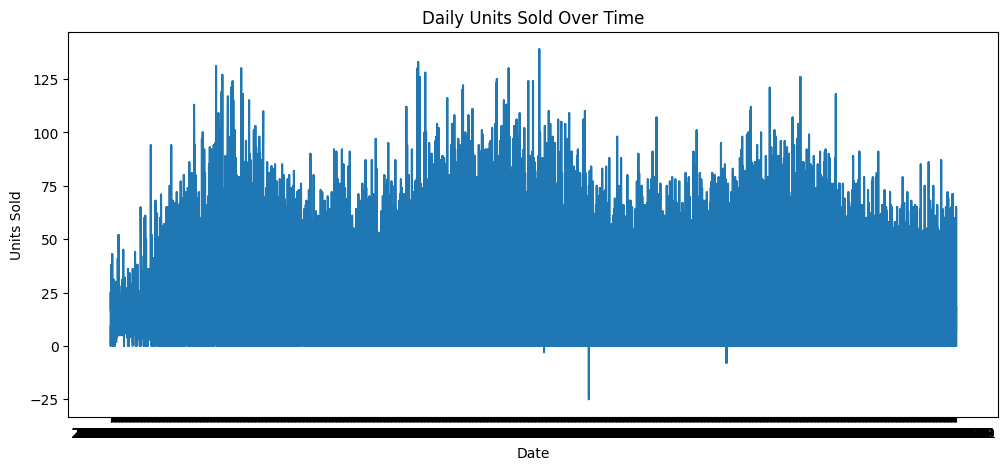

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['units_sold'])
plt.title("Daily Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

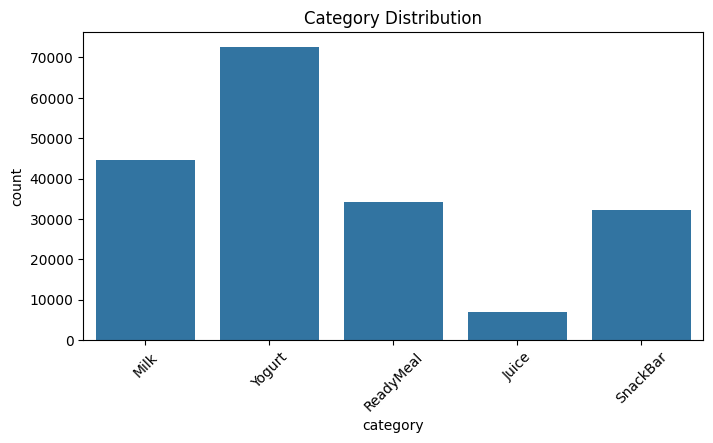

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='category')
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()


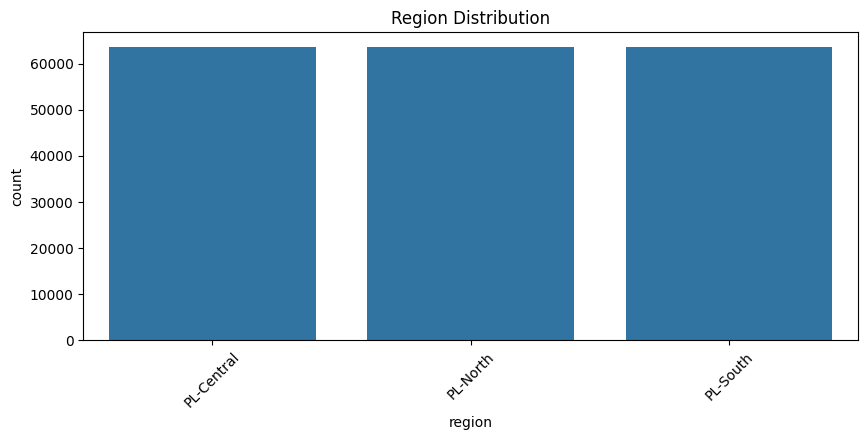

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='region')
plt.title("Region Distribution")
plt.xticks(rotation=45)
plt.show()


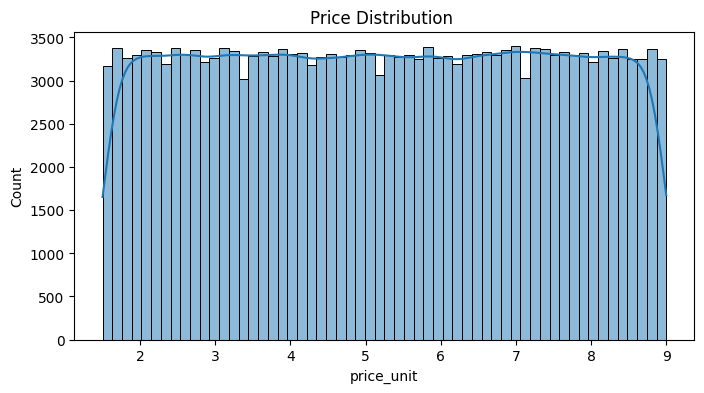

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df['price_unit'], kde=True)
plt.title("Price Distribution ")
plt.show()


In [18]:
#Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [19]:
#Sort the data by date
df = df.sort_values('date')

In [20]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


In [21]:
#Feature Engineering(Create Time Features)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

In [22]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,year,month,week,day,weekday,is_weekend
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,2022,1,3,21,4,0
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,2022,1,3,21,4,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,2022,1,3,21,4,0
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,2022,1,3,21,4,0
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,2022,1,3,21,4,0


In [23]:
#Encoding
from sklearn.preprocessing import LabelEncoder
cat_cols = ['sku', 'brand', 'category', 'segment', 'channel', 'region', 'pack_type']
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


In [24]:
#save Encoders
joblib.dump(encoders,"encoders.pkl")

['encoders.pkl']

In [25]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,year,month,week,day,weekday,is_weekend
0,2022-01-21,2,1,3,1,2,0,1,2.38,0,1,141,128,9,2022,1,3,21,4,0
1,2022-01-21,2,1,3,1,2,1,2,1.55,1,3,0,129,0,2022,1,3,21,4,0
2,2022-01-21,2,1,3,1,2,2,0,4.00,0,5,118,161,8,2022,1,3,21,4,0
3,2022-01-21,2,1,3,1,0,0,2,5.16,0,2,81,114,7,2022,1,3,21,4,0
4,2022-01-21,2,1,3,1,0,1,2,7.66,0,4,148,204,12,2022,1,3,21,4,0


In [26]:
df.dtypes

date               datetime64[ns]
sku                         int64
brand                       int64
segment                     int64
category                    int64
channel                     int64
region                      int64
pack_type                   int64
price_unit                float64
promotion_flag              int64
delivery_days               int64
stock_available             int64
delivered_qty               int64
units_sold                  int64
year                        int32
month                       int32
week                       UInt32
day                         int32
weekday                     int32
is_weekend                  int64
dtype: object

In [27]:
#Duplicate Check
df.duplicated().sum()

np.int64(0)

In [28]:
df[['price_unit','stock_available','delivered_qty','units_sold','delivery_days']].describe()

,price_unit,stock_available,delivered_qty,units_sold,delivery_days
count,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000
mean,5.251979,157.697652,179.333655,19.919709,3.004860
std,2.166705,52.736104,40.037475,11.770077,1.414626
min,1.500000,-12.000000,-11.000000,-25.000000,1.000000
25%,3.380000,124.000000,152.000000,12.000000,2.000000
50%,5.250000,155.000000,179.000000,18.000000,3.000000
75%,7.130000,192.000000,206.000000,25.000000,4.000000
max,9.000000,405.000000,366.000000,139.000000,5.000000


In [29]:
(df[['stock_available','delivered_qty','units_sold','delivery_days','price_unit']] < 0).sum()

stock_available    3
delivered_qty      3
units_sold         3
delivery_days      0
price_unit         0
dtype: int64

In [30]:
df = df[
    (df['stock_available'] >= 0) &
    (df['delivered_qty'] >= 0) &
    (df['units_sold'] >= 0)
]

In [31]:
(df[['stock_available','delivered_qty','units_sold']] < 0).sum()

stock_available    0
delivered_qty      0
units_sold         0
dtype: int64

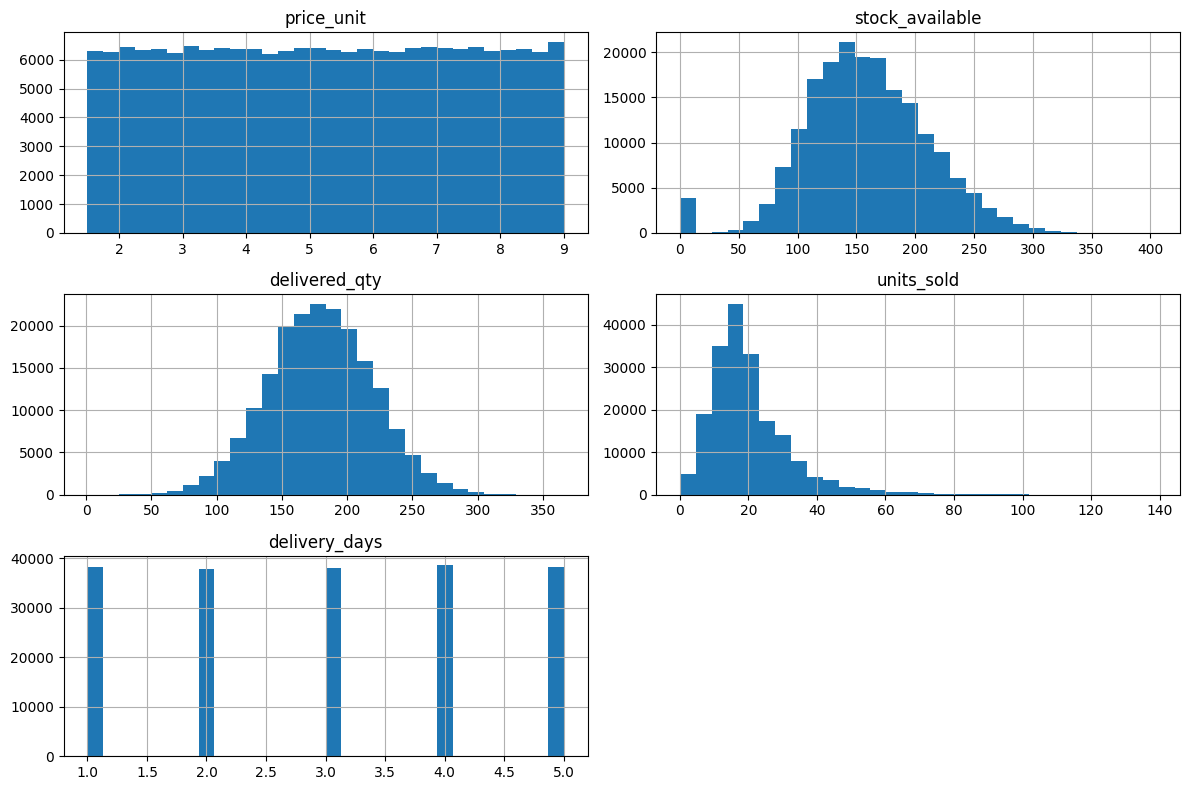

In [32]:
numeric_cols = ['price_unit', 'stock_available', 'delivered_qty', 'units_sold', 'delivery_days']

df[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


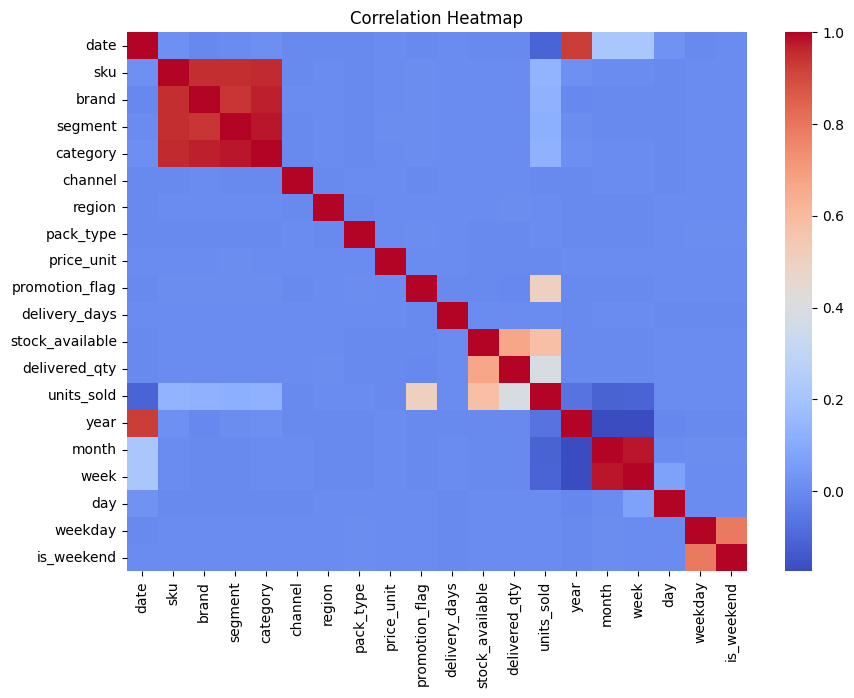

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [34]:
df[['delivered_qty','units_sold']].corr()

,delivered_qty,units_sold
delivered_qty,1.000000,0.389089
units_sold,0.389089,1.000000


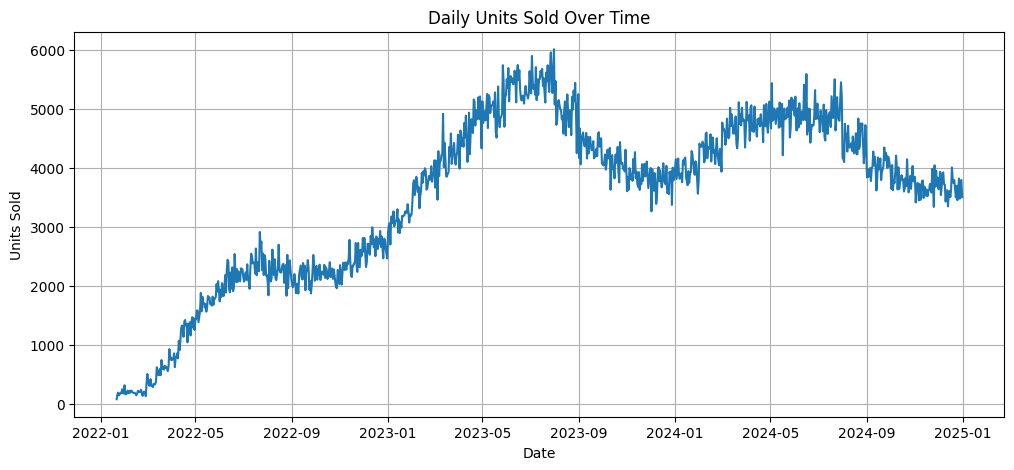

In [35]:
df_daily = df.groupby("date")["units_sold"].sum().reset_index()
plt.figure(figsize=(12,5))
plt.plot(df_daily["date"], df_daily["units_sold"])
plt.title("Daily Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()

C:\Users\aswat\AppData\Local\Temp\ipykernel_16108\3668692278.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="category", y="units_sold", ci=None)


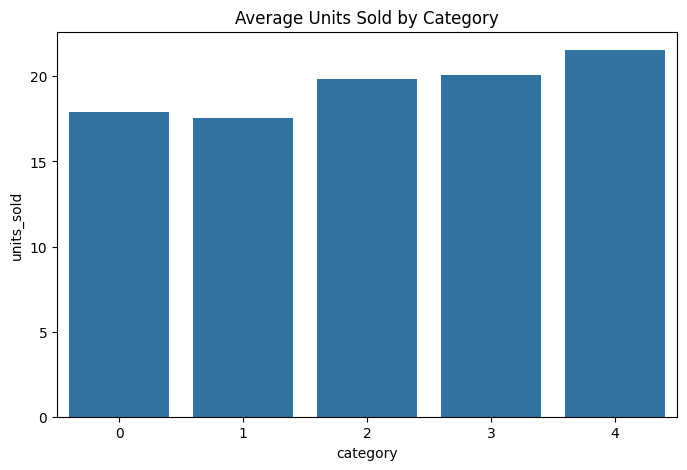

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="category", y="units_sold", ci=None)
plt.title("Average Units Sold by Category")
plt.show()

C:\Users\aswat\AppData\Local\Temp\ipykernel_16108\3484892859.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="region", y="units_sold", ci=None)


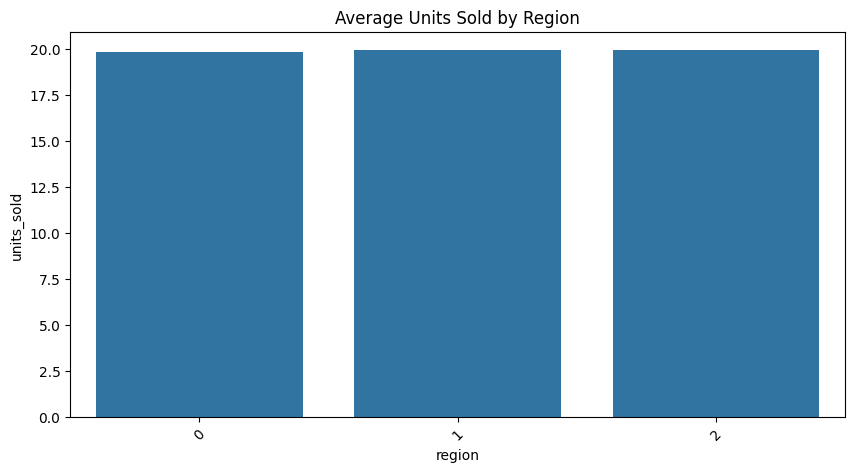

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="region", y="units_sold", ci=None)
plt.title("Average Units Sold by Region")
plt.xticks(rotation=45)
plt.show()

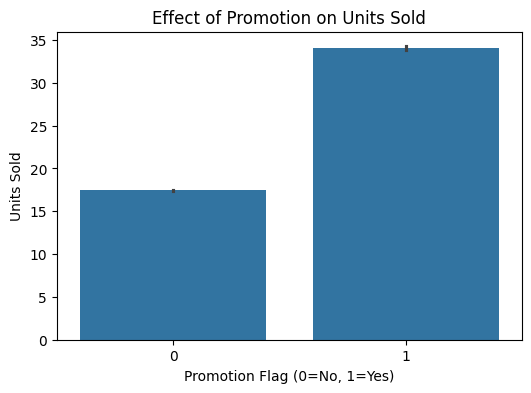

In [38]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="promotion_flag", y="units_sold")
plt.title("Effect of Promotion on Units Sold")
plt.xlabel("Promotion Flag (0=No, 1=Yes)")
plt.ylabel("Units Sold")
plt.show()

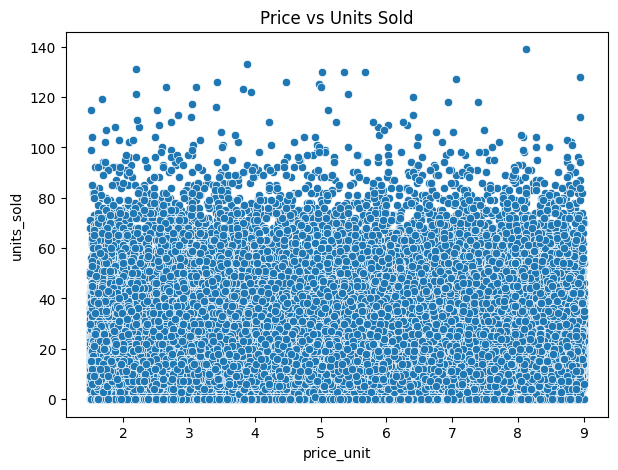

In [39]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="price_unit", y="units_sold")
plt.title("Price vs Units Sold")
plt.show()


C:\Users\aswat\AppData\Local\Temp\ipykernel_16108\3008585629.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="channel", y="units_sold", ci=None)


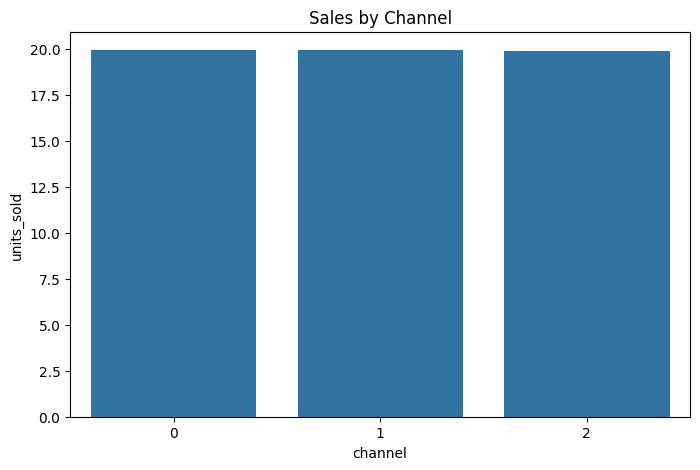

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel", y="units_sold", ci=None)
plt.title("Sales by Channel")
plt.show()

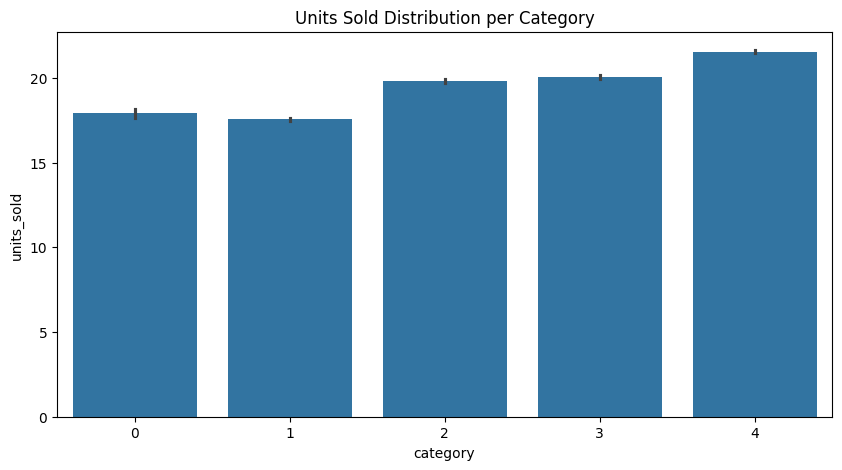

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="category", y="units_sold")
plt.title("Units Sold Distribution per Category")
plt.show()

In [42]:
features = [
    "sku", "brand", "segment", "category", "channel",
    "region", "pack_type", "price_unit", "promotion_flag",
    "delivery_days", "stock_available", "year", "month",
    "week", "day", "weekday", "is_weekend"
]

In [43]:
X = df[features]
y = df["units_sold"]

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50,max_depth=15,min_samples_split=10,random_state=42)
model.fit(X_train, y_train)

,n_estimators,50
,criterion,'squared_error'
,max_depth,15
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
joblib.dump(model, "model.pkl")
print("Training complete.")

Training complete.


In [47]:
print("MODEL FEATURES:", model.feature_names_in_)

MODEL FEATURES: ['sku' 'brand' 'segment' 'category' 'channel' 'region' 'pack_type'
 'price_unit' 'promotion_flag' 'delivery_days' 'stock_available' 'year'
 'month' 'week' 'day' 'weekday' 'is_weekend']


In [48]:
y_pred = model.predict(X_test)
y_pred

array([20.80092952, 47.78741423, 21.99291818, ..., 21.16419776,
       14.74905768, 23.45409047], shape=(38151,))

In [49]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.7711362049738146
RMSE: 5.608328668004575


In [50]:
pred_df = pd.DataFrame({'actual_units_sold': y_test,'predicted_units_sold': y_pred})
pred_df.head()

,actual_units_sold,predicted_units_sold
125725,25,20.800930
133096,34,47.787414
46784,21,21.992918
99868,18,17.150208
131809,20,15.881127


In [51]:
# Safety Stock
demand_std = df['units_sold'].std()      # how much daily demand fluctuates
safety_stock = demand_std * 1.65         # 95% service level buffer
print("Safety Stock:", safety_stock)

Safety Stock: 19.41955831195701


In [52]:
#Build inventory dataframe from test set rows
inv_df = df[['date','sku','delivery_days']].iloc[y_test.index].copy()
inv_df['actual_units_sold'] = y_test.values
inv_df['predicted_units_sold'] = y_pred

In [53]:
#Reorder Point (ROP)
inv_df['reorder_point'] = (inv_df['predicted_units_sold'] * inv_df['delivery_days'] + safety_stock)

In [54]:
#Recommended Inventory Level
inv_df['recommended_inventory'] = (inv_df['predicted_units_sold'] + safety_stock)

In [55]:
inv_df.head()

,date,sku,delivery_days,actual_units_sold,predicted_units_sold,reorder_point,recommended_inventory
125816,2024-03-23,28,3,25,20.800930,81.822347,40.220488
132952,2024-04-24,19,2,34,47.787414,114.994387,67.206973
46912,2023-04-12,27,3,21,21.992918,85.398313,41.412476
99779,2023-12-01,3,3,18,17.150208,70.870183,36.569766
131972,2024-04-19,27,2,20,15.881127,51.181812,35.300685


In [56]:
print(list(X.columns))

['sku', 'brand', 'segment', 'category', 'channel', 'region', 'pack_type', 'price_unit', 'promotion_flag', 'delivery_days', 'stock_available', 'year', 'month', 'week', 'day', 'weekday', 'is_weekend']
